## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras
import numpy as np
# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

print( x_train.shape )
print( y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    min = x.min()
    max = x.max()

    x = (x-min) / (max-min)

    if flatten:
        x = x.reshape((len(x), -1))
    return x
    
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [4]:

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
print(x_train.shape[1:])
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

(3072,)



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)         

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 5s 91us/step - loss: 2.0212 - acc: 0.2590 - val_loss: 1.8467 - val_acc: 0.3246
Epoch 2/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.7679 - acc: 0.3607 - val_loss: 1.7100 - val_acc: 0.3836
Epoch 3/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.6596 - acc: 0.4019 - val_loss: 1.6145 - val_acc: 0.4225
Epoch 4/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.5862 - acc: 0.4311 - val_loss: 1.6214 - val_acc: 0.4181
Epoch 5/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.5357 - acc: 0.4490 - val_loss: 1.5176 - val_acc: 0.4537
Epoch 6/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.4922 - acc: 0.4657 - val_loss: 1.5019 - val_acc: 0.4625
Epoch 7/100
50000/50

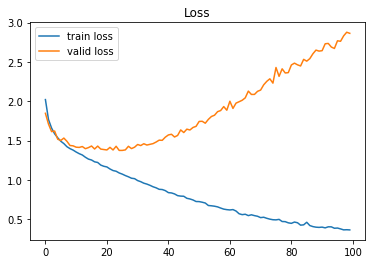

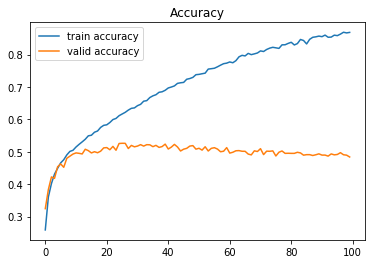

In [9]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()